In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Configurando o matplotlib para mostrar os gráficos no jupyter notebook
%matplotlib inline

# Carregando o dataset
fifa_data = pd.read_csv("fifa2019.csv", encoding='ISO-8859-1')

In [9]:
# Verificando as primeiras 5 linhas do dataset
fifa_data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31.0,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94.0,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,1,20801,Cristiano Ronaldo,33.0,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94.0,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,2,190871,Neymar Jr,26.0,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92.0,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,3,193080,De Gea,27.0,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91.0,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,4,192985,K. De Bruyne,27.0,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91.0,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M


In [10]:
# Verificando as informações do dataset
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18206 non-null  float64
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18206 non-null  float64
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [11]:
# Verificando a porcentagem de valores ausentes por coluna
(fifa_data.isnull().sum() / fifa_data.shape[0]) * 100

Unnamed: 0        0.000000
ID                0.000000
Name              0.000000
Age               0.005492
Photo             0.000000
                    ...   
GKHandling        0.263635
GKKicking         0.263635
GKPositioning     0.263635
GKReflexes        0.263635
Release Clause    8.590103
Length: 89, dtype: float64

In [ ]:
# Removendo as colunas 'Loaned From' e 'Release Clause'
fifa_data = fifa_data.drop(['Loaned From', 'Release Clause'], axis=1)

In [15]:
# Preenchendo os valores ausentes com a média
num_cols = fifa_data.select_dtypes(include=np.number).columns.tolist()
fifa_data[num_cols] = fifa_data[num_cols].fillna(fifa_data[num_cols].mean())

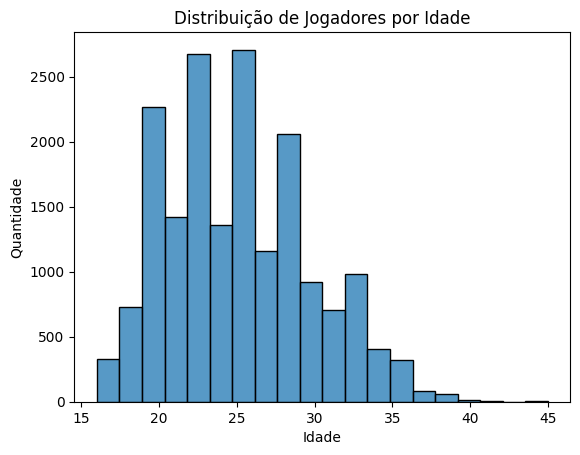

In [16]:
# Criando um histograma para distribuição de jogadores por idade
sns.histplot(data=fifa_data, x="Age", bins=20)
plt.title("Distribuição de Jogadores por Idade")
plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.show()

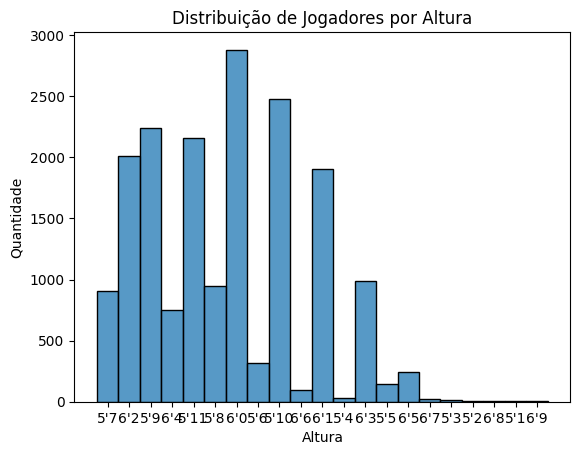

In [17]:
sns.histplot(data=fifa_data, x="Height")
plt.title("Distribuição de Jogadores por Altura")
plt.xlabel("Altura")
plt.ylabel("Quantidade")
plt.show()

In [23]:
# Filtrando o dataset para incluir apenas Neymar e Messi
neymar_data = fifa_data[fifa_data["Name"] == "Neymar Jr"]
messi_data = fifa_data[fifa_data["Name"] == "L. Messi"]

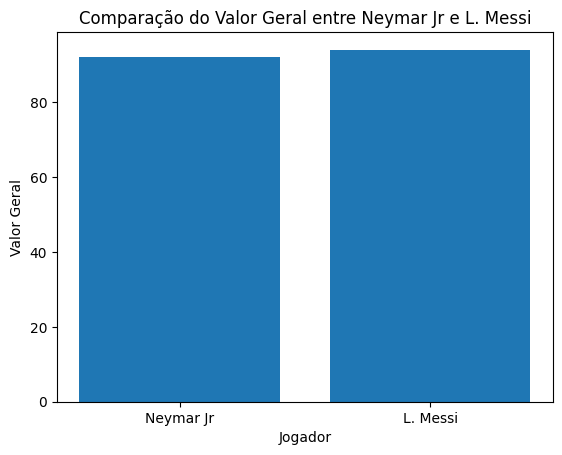

In [24]:
# Criando um gráfico de barra para comparar o valor geral dos jogadores
plt.bar(["Neymar Jr", "L. Messi"], [neymar_data["Overall"].values[0], messi_data["Overall"].values[0]])
plt.title("Comparação do Valor Geral entre Neymar Jr e L. Messi")
plt.xlabel("Jogador")
plt.ylabel("Valor Geral")
plt.show()

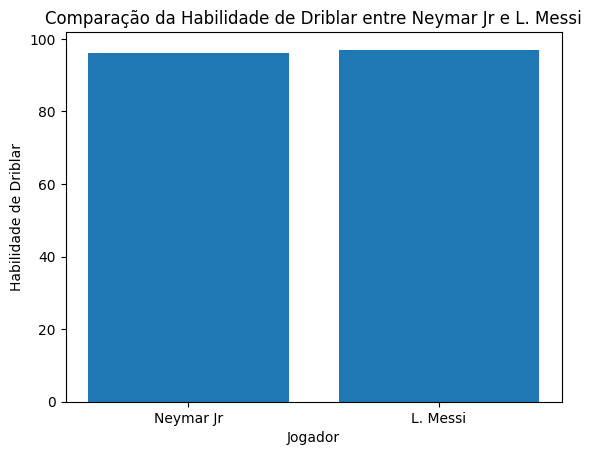

In [25]:
# Criando um gráfico de barra para comparar a habilidade de driblar dos jogadores
plt.bar(["Neymar Jr", "L. Messi"], [neymar_data["Dribbling"].values[0], messi_data["Dribbling"].values[0]])
plt.title("Comparação da Habilidade de Driblar entre Neymar Jr e L. Messi")
plt.xlabel("Jogador")
plt.ylabel("Habilidade de Driblar")
plt.show()

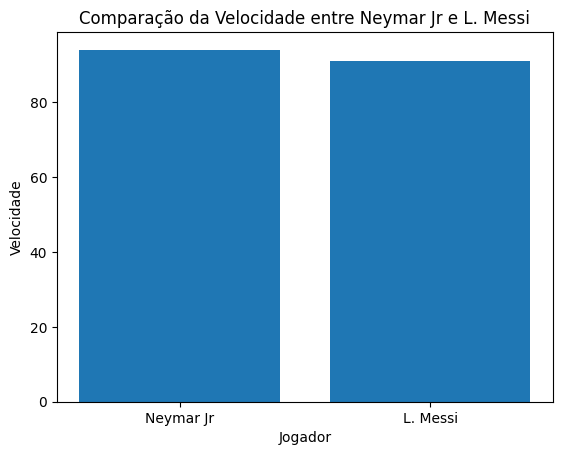

In [26]:
# Criando um gráfico de barra para comparar a velocidade dos jogadores
plt.bar(["Neymar Jr", "L. Messi"], [neymar_data["Acceleration"].values[0], messi_data["Acceleration"].values[0]])
plt.title("Comparação da Velocidade entre Neymar Jr e L. Messi")
plt.xlabel("Jogador")
plt.ylabel("Velocidade")
plt.show()

In [27]:
from pandas_profiling import ProfileReport

In [28]:
profile = ProfileReport(fifa_data[:20], title ="Pandas Profile Report")